In [13]:
import codecs
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
base = sqlite3.connect ('fishing.db')

In [15]:
df = pd.read_sql("select g.gd,g.bet,s.player_name,s.place,s.points from score s join game g on s.game_id = g.id", base)

In [16]:
df.gd = df.gd.apply(pd.to_datetime)

# Определение очков за уму

In [17]:
def uma(place):
    if place ==1:
        u = 25000
    elif place ==2:
        u = 10000
    elif place ==3:
        u = -10000
    elif place ==4:
        u= -25000
    return u

# Выбираем период расчета

In [18]:
df = df[df.gd > pd.datetime(2010,1,1)]

# Определение выигранного вэлью за ханчан

In [19]:
df['umapoints'] = df['place'].apply(uma)
df['val'] = (df['bet']/100)*(((df['points']-25000+df['umapoints'])))

# Расчет статистики по выигранному валуе и построение графика профита

In [20]:
#среднее место
df_avg = df.drop(df.columns[[1,4,5,6]],1)
df_avg = df_avg.groupby('player_name').mean()
df_avg.sort_values('place', ascending = True)

,place
player_name,
Афонин Михаил,1.500000
Чечин Вадим,2.000000
Кваша Илья,2.000000
Моримото Юки,2.083333
Белоусова Марина,2.166667
Ли Венлон,2.166667
Худяков Сергей,2.186047
Мартынов Иван,2.255319
Ким Евгений,2.327586


In [22]:
#подготовка датафрейма
df_val = df.drop(df.columns[[1,3,4,5]],1)
df_val_sum = df_val.groupby('player_name').sum()
#общий профит
df_val_sum.sort_values('val', ascending = False)

,val
player_name,
Алешин Сергей,54782.0
Леонтьев Алексей,53396.0
Гришин Виктор,45874.0
Мартынов Иван,45175.0
Плясунов Владислав,22228.0
Моримото Юки,12051.0
Сироткин Дмитрий,11621.0
Павлов Георгий,10773.0
Троценко Филипп,10644.0


In [23]:
#общее число ханчанов
df_val['player_name'].value_counts()

Черных Анастасия       878
Алешин Сергей          857
Леонтьев Алексей       790
Гришин Виктор          672
Плясунов Владислав     584
Васильев Сергей        575
Павлов Георгий         402
Петрущенко Сергей      397
Гоголев Максим         258
Троценко Филипп        221
Смоленцев Виктор       201
Мартынов Иван          188
Проскурякова Ольга     178
Фудзи Кейске           150
Манджиев Арслан        136
Сироткин Дмитрий       117
Наданьян Владимир       95
Жевленев Егор           91
Усманов Рамиль          84
Ким Евгений             58
Ткаченко Никита         47
Худяков Сергей          43
Гуркина Наталья         40
Моримото Юки            36
Козлов Виктор           26
Горячева Елена          26
Богатиков Александр     20
Бобров Валентин         12
Белоусова Марина        12
Коновалов Михаил        11
Патрикеев Павел         11
Хаипов Эдуард            9
Божедонов Александр      8
Ли Венлон                6
Кретов Никита            4
Мамин Владислав          3
Чечин Вадим              3
Ч

In [39]:
#по конкретному игроку и за период
df_player = df_val[(df_val.player_name == u'Васильев Сергей') & (df_val.gd >= pd.datetime(2014,1,1))]
#подготовительный расчет
s =[]
sum = 0
for i in df_player['val']:
    sum = sum + i 
    s.append(sum)

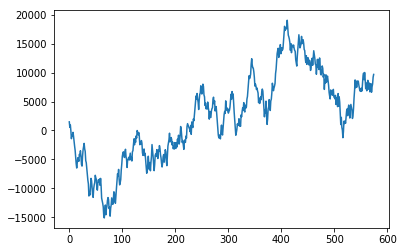

In [40]:
#построение графика (х:ханчаны, у:валуе)
plt.plot(s)